# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** I Putu Yogi Prasetya Dharmawan
- **Email:** yogidharmawan6@gmail.com
- **ID Dicoding:** yogiprasetyad

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Produk apakah yang paling banyak terjual di suatu Kota
- Pertanyaan 2 : Kota mana yang paling banyak membeli suatu produk
- Pertanyaan 3: Produk apakah yang paling banyak terjual dan paling sedikit terjual
- Pertanyaan 4: Bagaimanakah Tren Penjualan Produk setiap Bulannya
- Pertanyaan 5: Bagaimanakah Tren Pendapatan setiap Bulannya

## Import Semua Packages/Library yang Digunakan

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [32]:
#Memuat Data Customer dari E-Commerce
customers_df = pd.read_csv("https://raw.githubusercontent.com/YogiPrasetyaD/PublicDatasets/main/E-Commerce%20Public%20Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [33]:
#Memuat Data Geo Lokasi
geo_df = pd.read_csv("https://raw.githubusercontent.com/YogiPrasetyaD/PublicDatasets/main/E-Commerce%20Public%20Dataset/geolocation_dataset.csv")
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [34]:
#Memuat Data Order Item
order_items_df = pd.read_csv("https://raw.githubusercontent.com/YogiPrasetyaD/PublicDatasets/main/E-Commerce%20Public%20Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [35]:
#Memuat Data Order Payment
order_payment_df = pd.read_csv("https://raw.githubusercontent.com/YogiPrasetyaD/PublicDatasets/main/E-Commerce%20Public%20Dataset/order_payments_dataset.csv")
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [36]:
#Memuat Data Order_review
order_review_df = pd.read_csv("https://raw.githubusercontent.com/YogiPrasetyaD/PublicDatasets/main/E-Commerce%20Public%20Dataset/order_reviews_dataset.csv")
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [37]:
#Memuat Order
order_df = pd.read_csv("https://raw.githubusercontent.com/YogiPrasetyaD/PublicDatasets/main/E-Commerce%20Public%20Dataset/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [38]:
#Memuat Product Category
product_category_df = pd.read_csv("https://raw.githubusercontent.com/YogiPrasetyaD/PublicDatasets/main/E-Commerce%20Public%20Dataset/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [39]:
#Memuat Product Dataset
product_df = pd.read_csv("https://raw.githubusercontent.com/YogiPrasetyaD/PublicDatasets/main/E-Commerce%20Public%20Dataset/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [40]:
#Memuat sellers
sellers_df = pd.read_csv("https://raw.githubusercontent.com/YogiPrasetyaD/PublicDatasets/main/E-Commerce%20Public%20Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Dapat dilihat bahwa seluruh data berhasil dimasukan ke dalam dataframe dengan tujuan untuk memperoleh informasi yang diperlukan dalam melakukan proses analisis data. Dataframe memungkinkan kita untuk melakukan berbagai jenis analisis yang lebih mudah dan efisien dengan dibantu bahasa pemograman Python


### Assessing Data

In [41]:
#Memeriksa Anatomi dari customer Dataset
customers_df.info()

#Memeriksa nilai null pada customer Dataset
print(f"Jumlah Null Pada Dataset :\n{customers_df.isna().sum()}")

#Memeriksa nilai Duplikat pada customer Dataset
print(f"Jumlah Duplikat Pada Dataset : {customers_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah Null Pada Dataset :
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Jumlah Duplikat Pada Dataset : 0


Pada Dataset Customer, dapat dilihat bahwa dataset customer memiliki 5 field yang terdiri dari customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state yang sama sekali tidak memiliki null atau disebut juga data kosong didalamnya. Selain itu, pada dataset tersebut juga tidak memiliki duplikat di dalamnya dan tipe datanya juga sudah benar, sehingga data ini benar benar sudah bersih.

In [42]:
#Memeriksa Anatomi dari Geolocation Dataset
geo_df.info()

#Memeriksa nilai null pada Geolocation Dataset
print(f"Jumlah Null Pada Dataset :\n{geo_df.isna().sum()}")

#Memeriksa nilai Duplikat pada Geolocation Dataset
print(f"Jumlah Duplikat Pada Dataset : {geo_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Jumlah Null Pada Dataset :
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Jumlah Duplikat Pada Dataset : 261831


Pada Dataset Geolocation, dapat dilihat bahwa dataset Geolocation memiliki 5 field yang terdiri dari geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, dan geolocation_state yang sama sekali tidak memiliki null atau disebut juga data kosong didalamnya dan tipe datanya juga sudah benar. Tetapi, pada dataset tersebut juga memiliki duplikat di dalamnya sehingga harus dibersihkan nantinya pada proses cleaning.

In [43]:
#Memeriksa Anatomi dari Order Item Dataset
order_items_df.info() #janggal di shipping limit datenya mengenai datatype

#Memeriksa nilai null pada Order Item Dataset
print(f"Jumlah Null Pada Dataset :\n{order_items_df.isna().sum()}")

#Memeriksa nilai Duplikat pada Order Item Dataset
print(f"Jumlah Duplikat Pada Dataset : {order_items_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah Null Pada Dataset :
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Jumlah Duplikat Pada Dataset : 0


Pada Dataset Order Item, dapat dilihat bahwa dataset Order Item memiliki 7 field yang terdiri dari order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value yang sama sekali tidak memiliki null atau disebut juga data kosong didalamnya, tipe datanya juga sudah benar dan tidak memiliki duplikat di dalamnya.

In [44]:
#Memeriksa Anatomi dari Order Payment Dataset
order_payment_df.info()

#Memeriksa nilai null pada Order Payment Dataset
print(f"Jumlah Null Pada Dataset :\n{order_payment_df.isna().sum()}")

#Memeriksa nilai Duplikat pada Order Payment Dataset
print(f"Jumlah Duplikat Pada Dataset : {order_payment_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah Null Pada Dataset :
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Jumlah Duplikat Pada Dataset : 0


Pada Dataset Order Payment, dapat dilihat bahwa dataset Order Payment memiliki 4 field yang terdiri dari order_id, payment_sequential, payment_type, payment_installments, dan payment_value yang sama sekali tidak memiliki null atau disebut juga data kosong didalamnya, tipe datanya juga sudah benar dan tidak memiliki duplikat di dalamnya.

In [45]:
#Memeriksa Anatomi dari Order Review Dataset
order_review_df.info()

#Memeriksa nilai null pada Order Review Dataset
print(f"Jumlah Null Pada Dataset :\n{order_review_df.isna().sum()}")

#Memeriksa nilai Duplikat pada Order Review Dataset
print(f"Jumlah Duplikat Pada Dataset : {order_review_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah Null Pada Dataset :
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
Jumlah Duplikat Pada Dataset : 0


Pada Dataset Order Review Dataset, dapat dilihat bahwa dataset Order Review memiliki 6 field yang terdiri dari review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, dan review_answer_timestamp dengan 2 kolom yang memiliki banyak nilai null, tetapi hal ini diwajarkan diakarenakan hal tersbut mungkin memang sengaja tidak diberikan reiew pada ordernya sehingga kita tidak perlu membersihkannya. Dataset tersebut juga tidak memiliki nilai duplikat dan tipe datanya sudah benar.

In [46]:
#Memeriksa Anatomi dari Order Dataset
order_df.info()

#Memeriksa nilai null pada Order Dataset
print(f"Jumlah Null Pada Dataset :\n{order_df.isna().sum()}")

#Memeriksa nilai Duplikat pada Order Dataset
print(f"Jumlah Duplikat Pada Dataset : {order_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah Null Pada Dataset :
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_d

Pada Dataset Order, dapat dilihat bahwa dataset Order Item memiliki 7 field yang terdiri dari order_id, csutomer_id, order_status, order_purchase_timestamp, orde_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_Date, dengan 3 filed yang masih memiliki null, tatpi hal ini diwajarkan karena kita tidak bisa mengiisi nilai null dengan nilai sendiri karena konteksnya adalah pengiriman barang. tipe datanya juga masih salah seharusnya dari order purchase timestamp hingga estimated delivery date seharusnya datetime. Tetapi, dataset ini tidak memiliki duplikat di dalamnya.

In [47]:
#Memeriksa Anatomi dari Product Category Dataset
product_category_df.info()

#Memeriksa nilai null pada Product Category Dataset
print(f"Jumlah Null Pada Dataset :\n{product_category_df.isna().sum()}")

#Memeriksa nilai Duplikat pada Product Category Dataset
print(f"Jumlah Duplikat Pada Dataset : {product_category_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah Null Pada Dataset :
product_category_name            0
product_category_name_english    0
dtype: int64
Jumlah Duplikat Pada Dataset : 0


Pada dataset category ini sudah sangat bersih tidak perlu ada proses cleaning  di dalamnya

In [48]:
#Memeriksa Anatomi dari Product Dataset
product_df.info()

#Memeriksa nilai null pada Product Dataset
print(f"Jumlah Null Pada Dataset :\n{product_df.isna().sum()}")

#Memeriksa nilai Duplikat pada Product Dataset
print(f"Jumlah Duplikat Pada Dataset : {product_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah Null Pada Dataset :
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g

Pada dataset Product, terdapat 8 field, dan 7 filed masih memiliki nilai null. Pada null dari category name hingga photos qty, kita tidak bisa mngisi null tersebut dikarenakan kita harus meresearch lebih lanjut mengenai produk tersebut kategorinya apa, panjang namanya berapa, dan sebagainya. Sedangkan, untuk product weight hingga width kita bisa isi dengan nilai rata rata dari nama kategori produk tersbut. Untuk tipe data dan duplikatnya sudah benar dan bagus.

In [49]:
#Memeriksa Anatomi dari Seller Dataset
sellers_df.info()

#Memeriksa nilai null pada Seller Dataset
print(f"Jumlah Null Pada Dataset :\n{sellers_df.isna().sum()}")

#Memeriksa nilai Duplikat pada Seller Dataset
print(f"Jumlah Duplikat Pada Dataset : {sellers_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Jumlah Null Pada Dataset :
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
Jumlah Duplikat Pada Dataset : 0


Pada Dataset Seller, dapat dilihat bahwa dataset seller suadh sangat bersih dengan tipe datanya yang sudah benar, tidak memiliki nilai null, dan tiak memiliki nilai duplikat.

### Cleaning Data

In [50]:
#Mmebersihkan Geo_df

geo_df.drop_duplicates(inplace=True)
print(f"Jumlah Data Duplikat adalah : {geo_df.duplicated().sum()}")

Jumlah Data Duplikat adalah : 0


Pada kode diatas, merupakan kode untuk membersihkan duplikat dengan menggunakan syntax drop_duplicated().sum()

In [51]:
#Membersihkan Order Review

#1. Mengubah Datatype Creation Date dan Timestamp dari objek ke Datetime
datetime_columns = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_columns:
  order_review_df[column] = pd.to_datetime(order_review_df[column])

#2 Mengganti Null Comment Title dengan Tidak Ada Judul
order_review_df["review_comment_title"].value_counts()
order_review_df["review_comment_title"].fillna("Tidak Ada Judul", inplace=True)

#3 Mengganti Null Comment Message dengan Tidak ada Komentar
order_review_df["review_comment_message"].fillna("Tidak Ada Komentar", inplace=True)

order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Pada kode diatas merupakan kode untuk mengganti tipedata menjadi datetime, serta mengusu value yang kosong dengan syntax fillna()

In [52]:
#Membersihkan Order Dataset

#1. Mengganti Datatype menjadi datetime
datetime = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for columns in datetime:
  order_df[columns] = pd.to_datetime(order_df[columns])

order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


pada kode diatas dilakukan proses untuk mengganti seluruh kolom ynag bertipe bukan datetime menjadi datetime.

In [53]:
#Membersihkan Data Product
product_df.info()

#1. Mengisi Kolom Numerik yang null dnegan Mean
numeric_col = ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]
for col in numeric_col:
  mean = product_df[col].mean()
  product_df[col].fillna(mean, inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


pada kode diatas, kode diatas mengisi field yang kosong dengan nilai rata rata diikuti synatx mean() dan fillna()

## Exploratory Data Analysis (EDA)

### Explore ...

In [54]:
#Menggabungkan data product yang terjual pada order item berdasarkan product id
orderitems_product_df = pd.merge(
    left = order_items_df,
    right = product_df,
    how = "left",
    left_on = "product_id",
    right_on = "product_id"
)

orderitems_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [55]:
#Menggabungkan data customer yang membeli pada order berdasarkan customer id id
order_customer_df = pd.merge(
    left= order_df,
    right = customers_df,
    how = "left",
    left_on = "customer_id",
    right_on = "customer_id"
)

order_customer_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [56]:
#Menggabungkan data product yang terjual pada order item dan customer yang membeli product
all_df = pd.merge(
    left = orderitems_product_df,
    right = order_customer_df,
    how ="left",
    left_on = "order_id",
    right_on = "order_id"
)

all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apakah yang paling banyak terjual di suatu Kota

                                      Order Count  Item  Total Price
product_category_name  customer_city                                
cama_mesa_banho        sao paulo             1653  2495    170705.41
beleza_saude           sao paulo             1533  2264    189361.87
informatica_acessorios sao paulo             1004  1762    144635.68
moveis_decoracao       sao paulo              998  1741    100033.05
utilidades_domesticas  sao paulo             1107  1739    104820.45 



<ipython-input-57-2336a16e2507>:21: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.barplot(x="Item", y="product_category_name", hue="customer_city", data=by_category_df.head(5), palette=color, dodge=False)


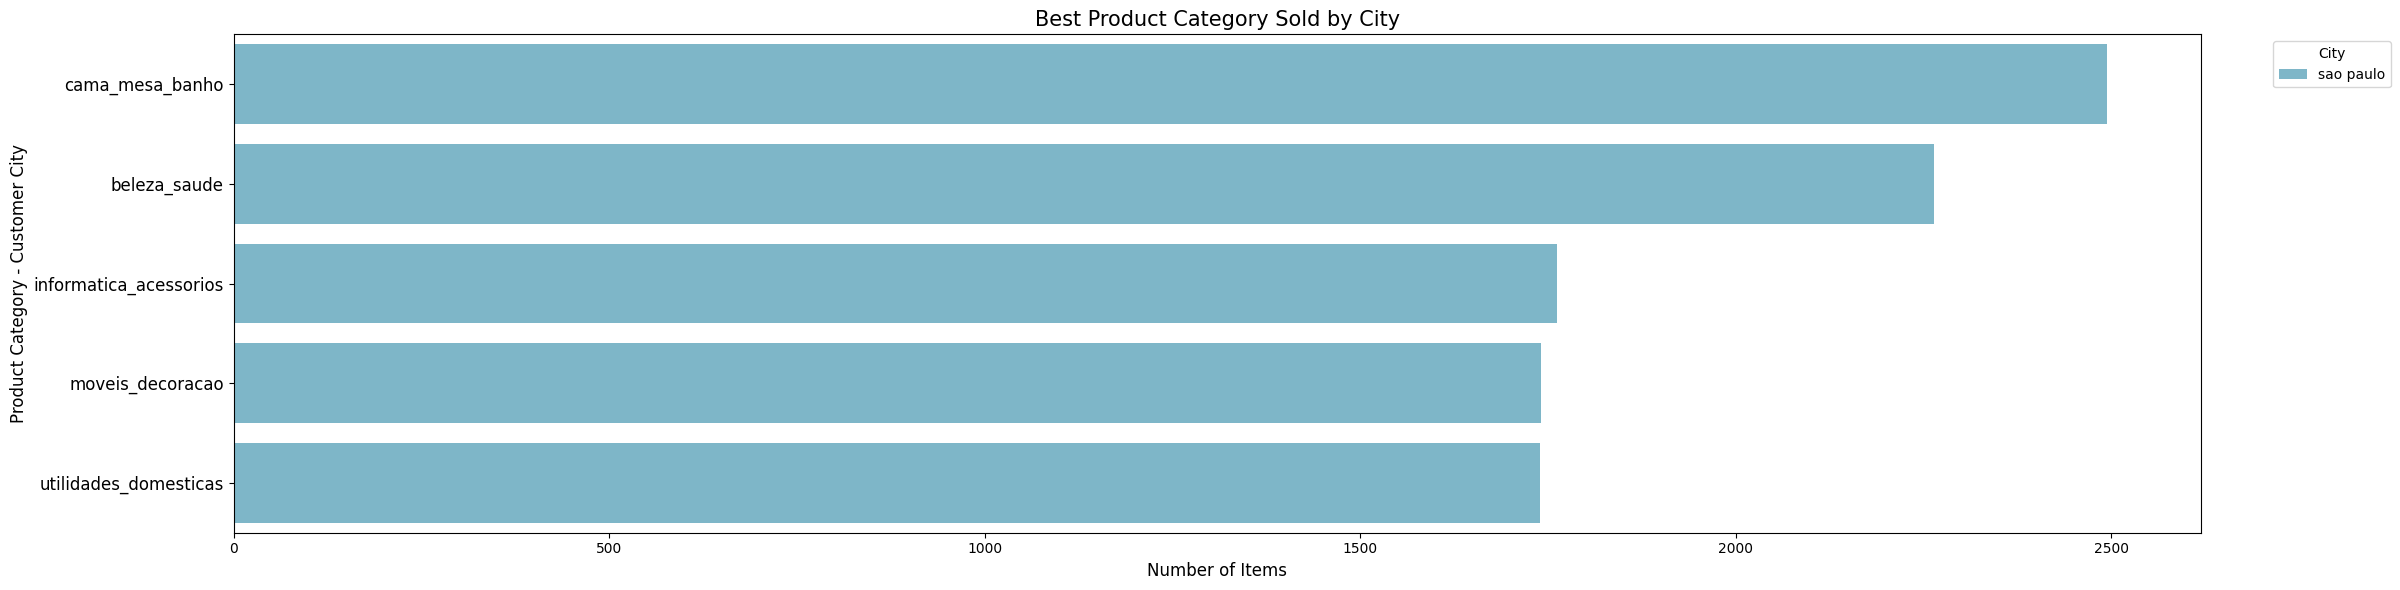

In [57]:
#Melihat Kategori Product yang paling banyak terjual di suatu kota

by_category_df = all_df.groupby(by=["product_category_name", "customer_city"]).agg({
    "order_id" : "nunique",
    "order_item_id" : "sum",
    "price" : "sum",
}).sort_values(by="order_item_id", ascending=False)

by_category_df.rename(columns={
    "order_id" : "Order Count",
    "order_item_id" : "Item",
    "price" : "Total Price",
},inplace=True)

print(by_category_df.head(),"\n")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))

color = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Menambahkan informasi kota ke dalam label sumbu-y
sns.barplot(x="Item", y="product_category_name", hue="customer_city", data=by_category_df.head(5), palette=color, dodge=False)
ax.set_ylabel("Product Category - Customer City", fontsize=12)  # Mengubah label sumbu-y
ax.set_xlabel("Number of Items", fontsize=12)
ax.set_title("Best Product Category Sold by City", loc="center", fontsize=15)
ax.tick_params(axis='y', labelsize=12)
ax.legend(title="City", loc="upper right", bbox_to_anchor=(1.1, 1))  # Menambahkan legenda
plt.tight_layout()  # Memastikan tata letak plot yang baik
plt.show()

### Pertanyaan 2: Kota mana yang paling banyak membeli suatu produk

                Order Count   Item  Total Price
customer_city                                  
sao paulo             15402  21907   1914924.54
rio de janeiro         6834   9405    992538.86
belo horizonte         2750   3730    355611.13
brasilia               2116   2790    301920.25
curitiba               1510   2176    211738.06 



<ipython-input-58-f6d3df86e0a2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Item", y="customer_city", data=by_customer_df.head(5), palette=colors)


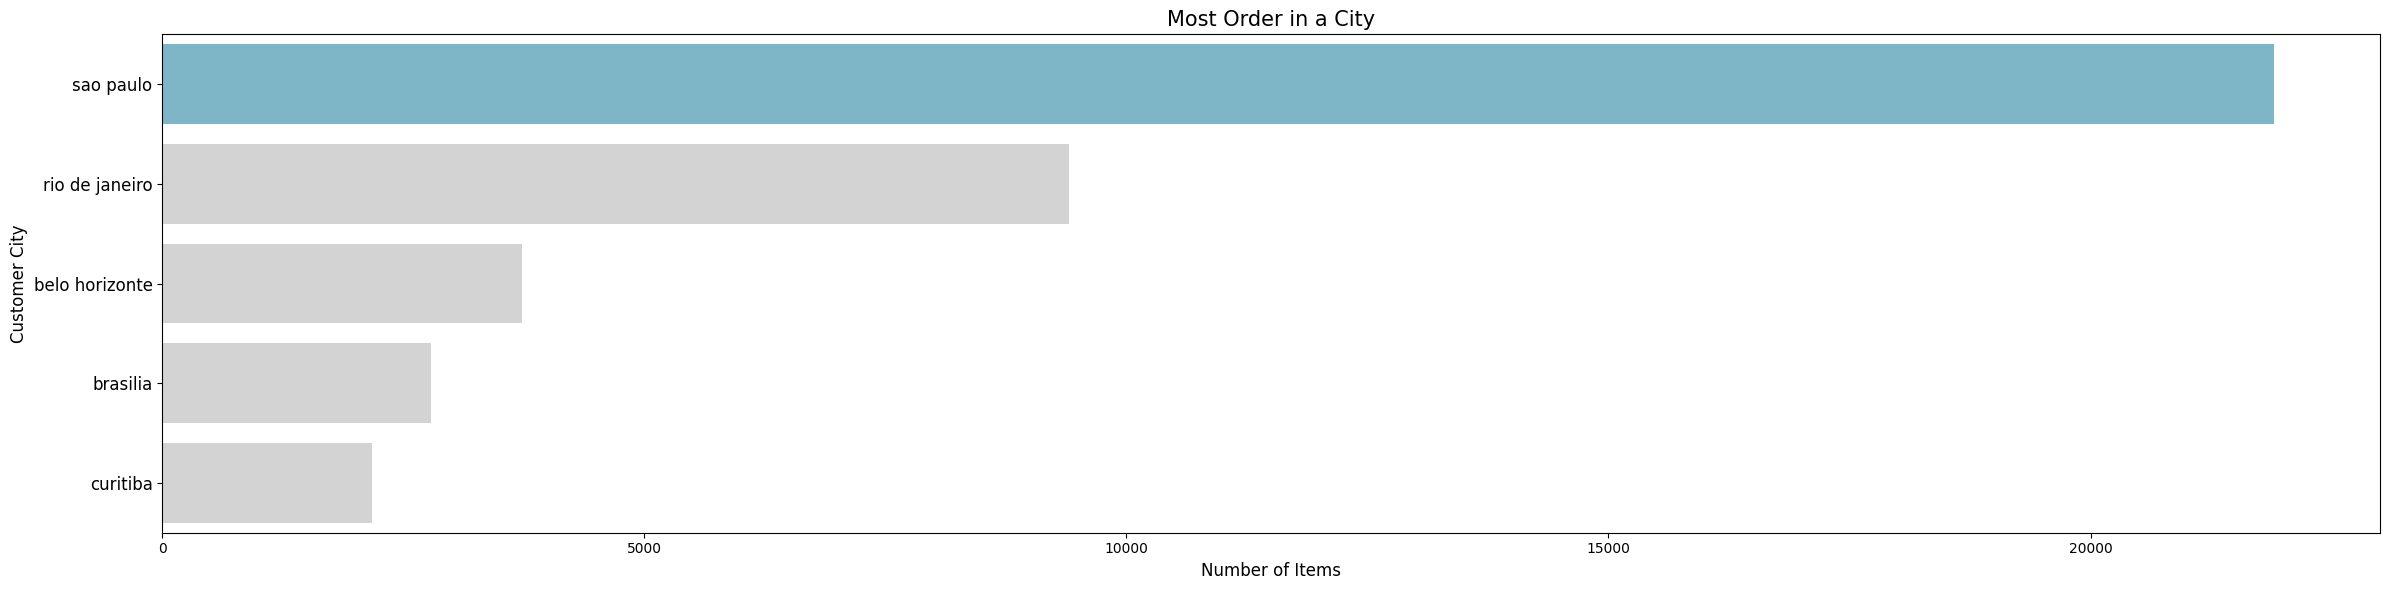

In [58]:
#Melihat Customer yang paling banyak membeli product di suatu kota

by_customer_df = all_df.groupby(by=["customer_city"]).agg({
    "order_id" : "nunique",
    "order_item_id" : "sum",
    "price" : "sum",
}).sort_values(by="order_item_id", ascending=False)

by_customer_df.rename(columns={
    "order_id" : "Order Count",
    "order_item_id" : "Item",
    "price" : "Total Price",
},inplace=True)

print(by_customer_df.head(),"\n")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
# Menampilkan 5 kota dengan jumlah item terbanyak
sns.barplot(x="Item", y="customer_city", data=by_customer_df.head(5), palette=colors)
ax.set_ylabel("Customer City", fontsize=12)  # Mengubah label sumbu-y
ax.set_xlabel("Number of Items", fontsize=12)
ax.set_title("Most Order in a City", loc="center", fontsize=15)
ax.tick_params(axis='y', labelsize=12)
plt.tight_layout()  # Memastikan tata letak plot yang baik
plt.show()

### Pertanyaan 3: Produk apakah yang paling banyak terjual dan paling sedikit terjual

    product_category_name  order_item_id
0         cama_mesa_banho          13665
1        moveis_decoracao          11540
2            beleza_saude          11081
3           esporte_lazer           9932
4  informatica_acessorios           9874 

                            product_category_name  order_item_id
72                             seguros_e_servicos              2
71                  fashion_roupa_infanto_juvenil              8
70                                       pc_gamer             11
69                                     la_cuisine             16
68  portateis_cozinha_e_preparadores_de_alimentos             16 



<ipython-input-59-8f631af1a1ee>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=all_order_df.head(5), palette=colors, ax=ax[0])
<ipython-input-59-8f631af1a1ee>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=all_order_df.sort_values(by="order_item_id",ascending=True).head(5),palette=colors, ax=ax[1])


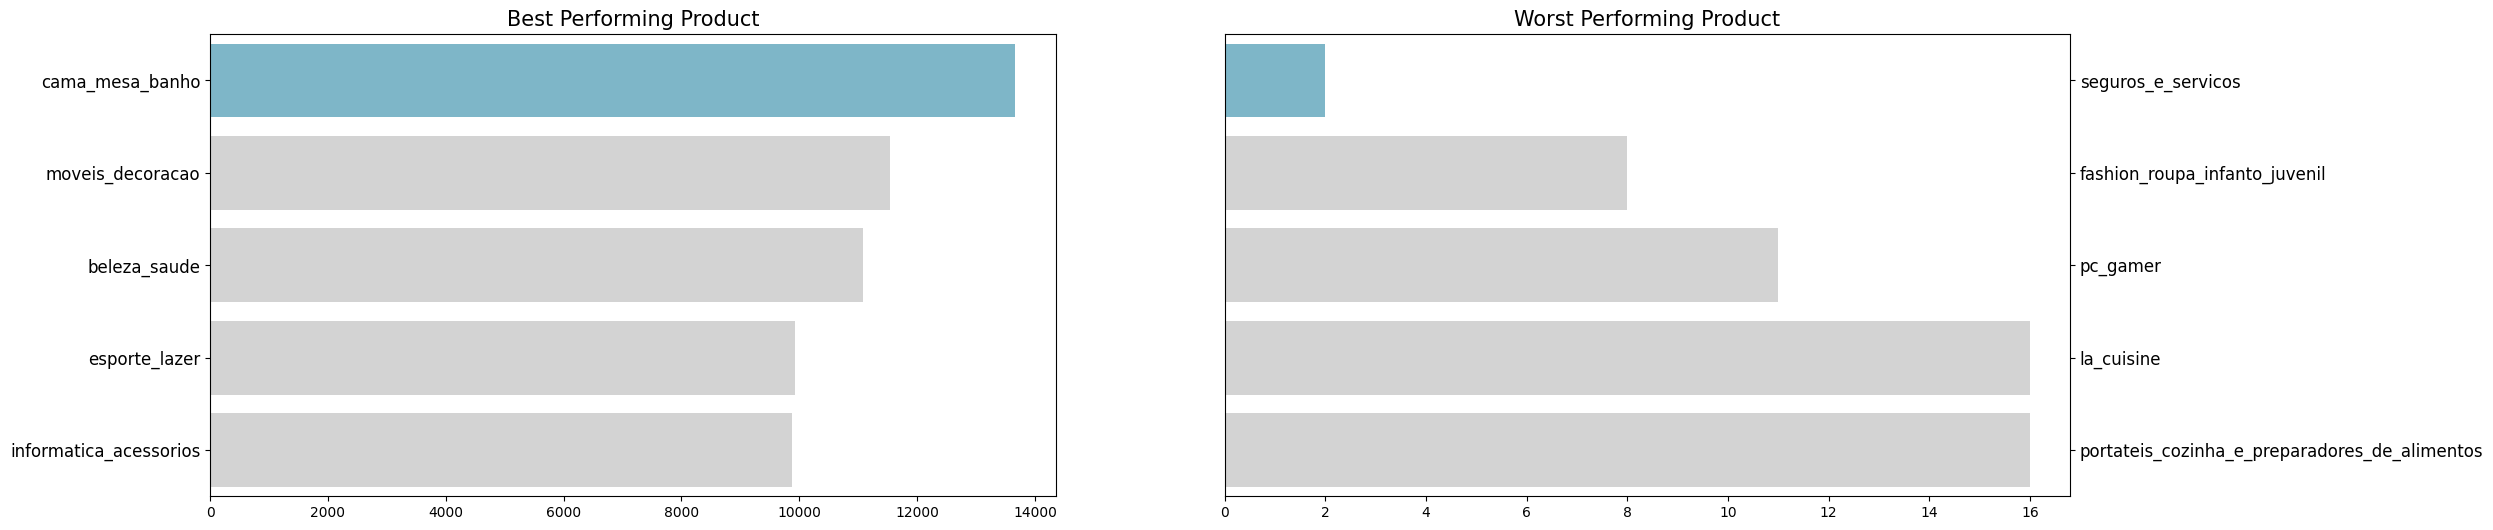

In [59]:
#Memperlihatkan Produk yang sering terjual dsn jarang Terjual

all_order_df= all_df.groupby(by="product_category_name").order_item_id.sum().sort_values(ascending=False).reset_index()
print(all_order_df.head(5),"\n")
print(all_order_df.sort_values(by="order_item_id", ascending=True).head(5),"\n")

fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(24,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id", y="product_category_name", data=all_order_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_item_id", y="product_category_name", data=all_order_df.sort_values(by="order_item_id",ascending=True).head(5),palette=colors, ax=ax[1])
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=12)

### Pertanyaan 4: Bagaimanakah Tren Penjualan Produk setiap Bulannya

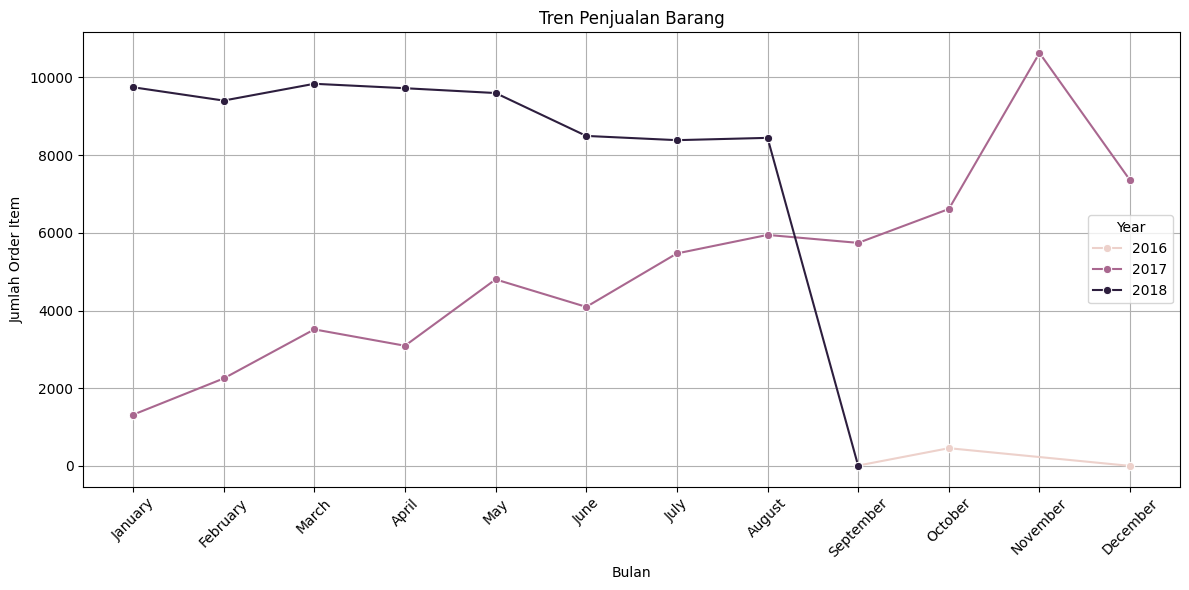

In [60]:
import calendar
# Ekstrak tahun dari kolom order_purchase_timestamp
all_df['Year'] = all_df['order_purchase_timestamp'].dt.year
all_df['Month'] = all_df['order_purchase_timestamp'].dt.month

# Pengelompokkan data berdasarkan tahun dan bulan dan hitung total order item untuk setiap bulan dan tahun
monthly_order_items = all_df.groupby(['Year','Month'])['order_item_id'].sum().reset_index()

# Plot tren penjualan setiap bulan untuk setiap tahun
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_order_items, x='Month', y='order_item_id', hue='Year', marker='o')
plt.title('Tren Penjualan Barang')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Order Item')
plt.xticks(range(1, 13), calendar.month_name[1:13], rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

### Pertanyaan 5: Bagaimanakah Tren Pendapatan setiap Bulannya

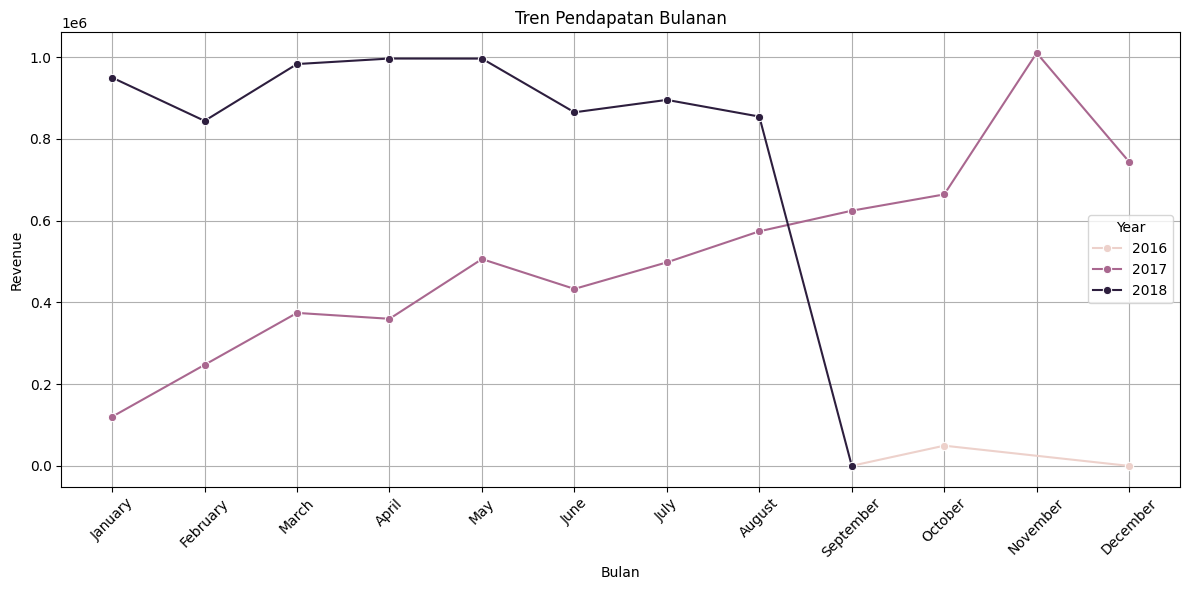

In [61]:
# Ekstrak tahun dan bulan dari kolom order_purchase_timestamp
all_df['Year'] = all_df['order_purchase_timestamp'].dt.year
all_df['Month'] = all_df['order_purchase_timestamp'].dt.month

# Pengelompokkan data berdasarkan bulan dan tahun dan hitung total pendapatan penjualan untuk setiap bulan dan tahun
monthly_revenue = all_df.groupby(['Year', 'Month'])['price'].sum().reset_index()

# Plot tren penjualan setiap bulan dan tahun
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='Month', y='price', hue='Year', marker='o')
plt.title('Tren Pendapatan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Revenue')
plt.xticks(range(1, 13), calendar.month_name[1:13], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
all_df.to_csv("all_data.csv", index=False)

## Conclusion

**Pertanyaan 1 : Produk apakah yang paling banyak terjual di suatu Kota**
- Terdapat Top 5 produk yang terjual dengan nama kategori yaitu cama mesa banho, beleza saude, informatica accessoris,  moveis decoracao, dan utilidades domesticas. Produk produk tersbut terjual di kota yang sama yaitu sao paulo, hal ini juga dapat disimpulkan bahwa sao paulo merupakan kota terbanyak yang memakai produk tersbut


**Pertanyaan 2 : Kota mana yang paling banyak membeli suatu produk**
- Terdapat 5 kota terbanyak yang membeli suatu produk yaitu curitiba, brasilia, belohorizonte, rio de janeiro, dn yang paling terbanyak tentunya adalah **sao paulo**.


**Pertanyaan 3: Produk apakah yang paling banyak terjual dan paling sedikit terjual**
- Dilihat pada grafik produk yang paling banyak diminati oleh customer yaitu cama mesa banho, dan yang paling sedikit diminati yaitu seguros e servicos.

**Pertanyaan 4: Bagaimanakah Tren Penjualan Produk setiap Bulannya**
- Jika dilihat dari grafik, penjualan produk mengalami kenaikan yang signifikan di tahun 2016 menuju 2017 dan stagnan memasuki tahun 2018


**Pertanyaan 5: Bagaimanakah Tren Pendapatan setiap Bulannya**
- Jika dilihat dari grafik, pendapatan dari penjualan produk mengalami kenaikan yang signifikan di tahun 2016 menuju 2017 dan stagnan memasuki tahun 2018. Hal ini sejalan dengan banyaknya produk yang terjual jika dilihat dari tren penjualan produk.